In [1]:

import pandas as pd
df = pd.read_csv('datasets/PhiUSIIL_Phishing_URL_Dataset.csv')

In [2]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [3]:
original_df = pd.read_csv('datasets/PhiUSIIL_Phishing_URL_Dataset.csv')
original_df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


# Data Pre-Processing 

In [4]:
# Checking again for any missing values in the dataset
missing_values_df = df.isnull().sum()

# Filtering the columns that have missing values
missing_columns_df = missing_values_df[missing_values_df > 0]

# Check if there are any missing values and display an appropriate message
# Display a message if there are missing values or not
if missing_columns_df.empty:
    message = "There are no missing values in the dataset."
else:
    message = f"There are missing values in the following columns:\n{missing_columns_df}"

message

'There are no missing values in the dataset.'

In [5]:
# Selecting categorical columns in the dataframe
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

categorical_columns

['FILENAME', 'URL', 'Domain', 'TLD', 'Title']

In [6]:
# Removing other unwanted categorical columns
try:
    df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title', 'URLSimilarityIndex'], inplace=True)
    message = "['FILENAME', 'URL', 'Domain', 'Title'] has been removed from the dataset"
except KeyError as e:
    message = f"Error: {e}"

# Display new columns after removing unwanted ones
message

"['FILENAME', 'URL', 'Domain', 'Title'] has been removed from the dataset"

In [7]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Convert the 'TLD' column using label encoding since it's categorical
label_encoder = LabelEncoder()
df['TLD'] = label_encoder.fit_transform(df['TLD'])

print("All TLD values has been encoded successfully")

All TLD values has been encoded successfully


In [8]:
from sklearn.model_selection import train_test_split, cross_val_predict

# Prepare features (X) and labels (y)
X = df.drop(columns=['label'])  # Drop the target label (adjust columns as needed)
y = df['label']  # Target label

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

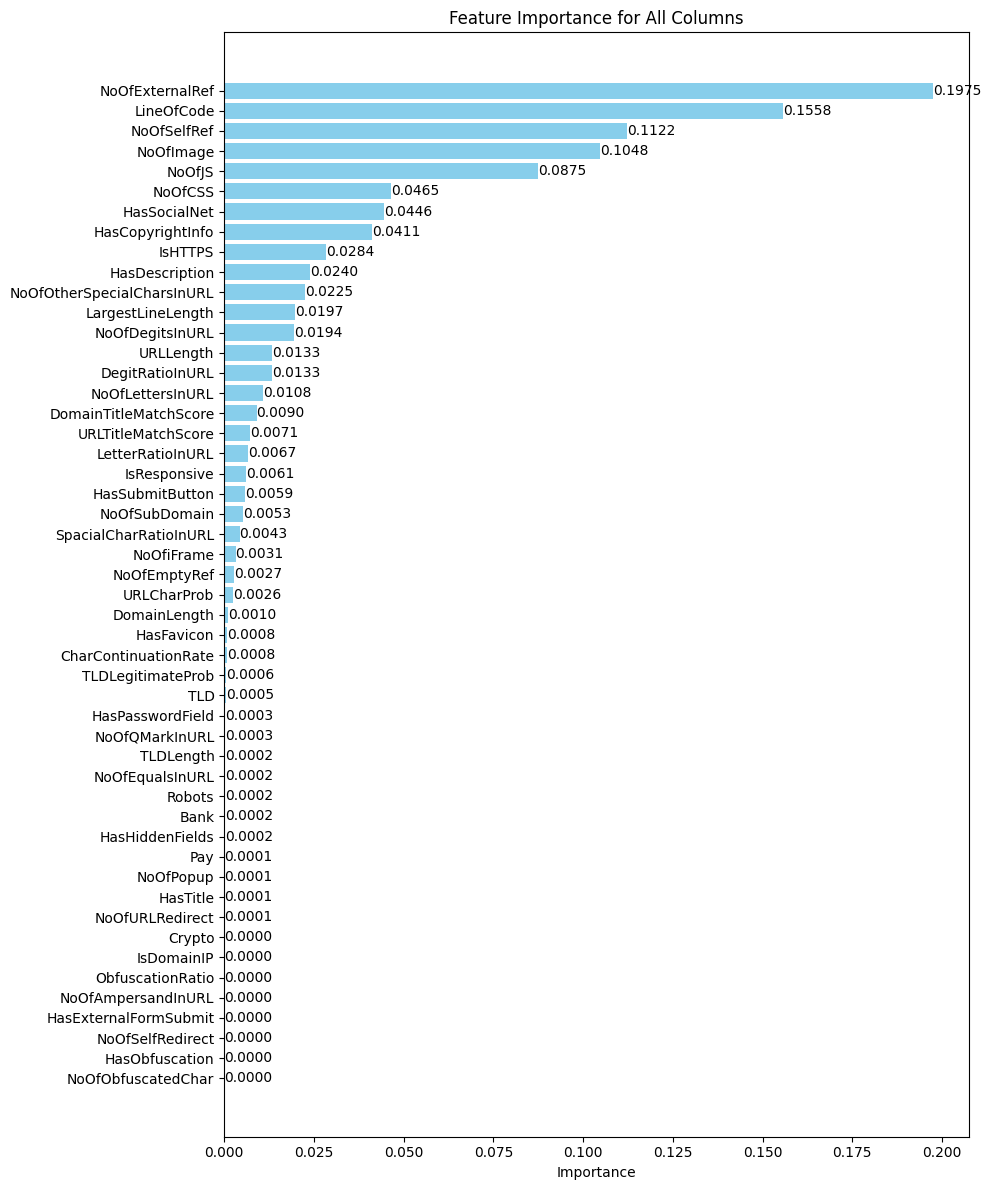

In [10]:
# Extracting feature importances
feature_importances = model.feature_importances_

# Creating a DataFrame for feature importance and sorting by importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Creating a DataFrame for feature importance and sorting by importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting all features with numerical labels on the bars
plt.figure(figsize=(10, 12))
bars = plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')

# Adding the importance values as labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

plt.xlabel('Importance')
plt.title('Feature Importance for All Columns')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.tight_layout()
plt.show()

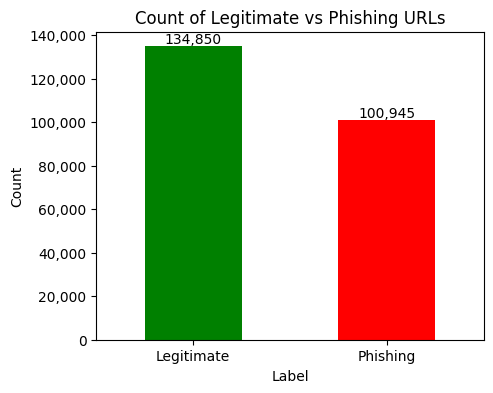

In [11]:
# Counting the number of legitimate and phishing URLs
url_counts = df['label'].value_counts()

# Plotting the bar graph with labels
plt.figure(figsize=(5, 4))
ax = url_counts.plot(kind='bar', color=['green', 'red'])

# Adding labels on top of the bars with commas for readability
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

# Formatting the y-axis labels with commas for readability
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title('Count of Legitimate vs Phishing URLs')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Phishing'], rotation=0)
plt.show()

In [12]:
# Functions for plotting graphs

import matplotlib.pyplot as plt

def PlotFeatureGraph(columns_to_plot):
    # Predefined column categories
    density_columns = [
        'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'LetterRatioInURL', 
        'DegitRatioInURL', 'SpacialCharRatioInURL', 'DomainTitleMatchScore', 'URLTitleMatchScore'
    ]
    
    non_binary_columns = [
        'URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 
        'NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
        'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 
        'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
        'NoOfEmptyRef', 'NoOfExternalRef'
    ]
    
    tld_columns = ['TLD']
    
    binary_columns = [
        'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 
        'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit', 
        'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 
        'Crypto', 'HasCopyrightInfo'
    ]
    
    # Filter columns based on their category
    density_plots = [col for col in columns_to_plot if col in density_columns]
    non_binary_plots = [col for col in columns_to_plot if col in non_binary_columns]
    binary_plots = [col for col in columns_to_plot if col in binary_columns]
    tld_plots = [col for col in columns_to_plot if col in tld_columns]
    
    # Total number of plots to make
    total_plots = len(density_plots) + len(non_binary_plots) + len(binary_plots) + len(tld_plots)
    
    if total_plots == 0:
        print("Columns do not match any predefined categories for plotting.")
        return

    # Define the number of columns for each figure's subplot grid
    n_cols = 3  # 3 columns per row
    max_plots_per_figure = 12  # Maximum number of subplots per figure

    # Initialize plot index across multiple figures
    plot_idx = 0  

    def create_new_figure():
        """Helper function to create a new figure and reset plot index."""
        nonlocal plot_idx
        plot_idx = 0
        plt.figure(figsize=(18, 18))  # 3 columns and enough height for multiple rows

    create_new_figure()

    # Plot density columns
    for column in density_plots:
        if plot_idx >= max_plots_per_figure:
            plt.tight_layout()
            plt.show()
            create_new_figure()

        plt.subplot(max_plots_per_figure // n_cols, n_cols, plot_idx % max_plots_per_figure + 1)
        df[df['label'] == 1][column].plot(kind='density', label='Legitimate', color='green', alpha=0.6)
        df[df['label'] == 0][column].plot(kind='density', label='Phishing', color='red', alpha=0.6)
        plt.title(f'Density Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.legend()
        plot_idx += 1

    # Plot non-binary integer columns
    for column in non_binary_plots:
        if plot_idx >= max_plots_per_figure:
            plt.tight_layout()
            plt.show()
            create_new_figure()

        plt.subplot(max_plots_per_figure // n_cols, n_cols, plot_idx % max_plots_per_figure + 1)
        counts, bins, patches = plt.hist(df[column], bins=30, color='blue', alpha=0.7)
        
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Dynamically calculate the threshold as a percentage of the maximum count
        max_count = counts.max()
        threshold = max(2, 0.05 * max_count)  # Set minimum threshold of 2, or 5% of the max count

        # Add labels to each bar if the count is above the calculated threshold
        for count, bin_edge in zip(counts, bins[:-1]):
            if count > threshold:
                plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), 
                        ha='center', va='bottom')

        plot_idx += 1


    # Plot TLD-related columns
    for column in tld_plots:
        if plot_idx >= max_plots_per_figure:
            plt.tight_layout()
            plt.show()
            create_new_figure()
        
        # Decode TLD column for proper visualization
        df[column] = label_encoder.inverse_transform(df[column])

        legitimate_tlds = df[df['label'] == 1][column].value_counts().head(5)
        phishing_tlds = df[df['label'] == 0][column].value_counts().head(5)

        plt.subplot(max_plots_per_figure // n_cols, n_cols, plot_idx % max_plots_per_figure + 1)
        bars_legitimate = legitimate_tlds.plot(kind='bar', color='green')
        plt.title('Top 5 Legitimate TLDs')
        plt.xlabel('TLD')
        plt.ylabel('Count')
        plt.xticks(rotation=45)

         # Add labels to the bars
        for bar in bars_legitimate.patches:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
                     ha='center', va='bottom')
            
        plot_idx += 1

        if plot_idx >= max_plots_per_figure:
            plt.tight_layout()
            plt.show()
            create_new_figure()

        plt.subplot(max_plots_per_figure // n_cols, n_cols, plot_idx % max_plots_per_figure + 1)
        bars_phishing = phishing_tlds.plot(kind='bar', color='red')
        plt.title('Top 5 Phishing TLDs')
        plt.xlabel('TLD')
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        # Add labels to the bars
        for bar in bars_phishing.patches:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
                     ha='center', va='bottom')
            
        plot_idx += 1

    # Plot binary columns
    for column in binary_plots:
        if plot_idx >= max_plots_per_figure:
            plt.tight_layout()
            plt.show()
            create_new_figure()

        plt.subplot(max_plots_per_figure // n_cols, n_cols, plot_idx % max_plots_per_figure + 1)
        counts = df[column].value_counts().sort_index()  # Ensure consistent order (0,1)
        ax = counts.plot(kind='bar', color=['green', 'red'], alpha=0.6, edgecolor='black')

        ymax = counts.max() * 1.10  # 10% more than the max count
        ax.set_ylim(0, ymax)

        for p in ax.patches:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2,  
                height + ymax * 0.01,           
                f'{int(height):,}',             
                ha='center', va='bottom',        
                fontsize=8,                      
                fontweight='bold',               
                color='black'                    
            )

        plt.title(f'Distribution of {column}')
        plt.ylabel('Count')
        plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Phishing'], rotation=0)
        plot_idx += 1

    # Final tight_layout and show for the last figure
    plt.tight_layout()
    plt.show()


In [13]:
low_importance_features = features_df[features_df['Importance'] < 0.0002]['Feature']
df = df.drop(columns=low_importance_features)

df.columns

Index(['URLLength', 'DomainLength', 'TLD', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'HasDescription', 'NoOfiFrame', 'HasSocialNet', 'HasSubmitButton',
       'HasPasswordField', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS',
       'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],
      dtype='object')

## Plotting of graphs for each features

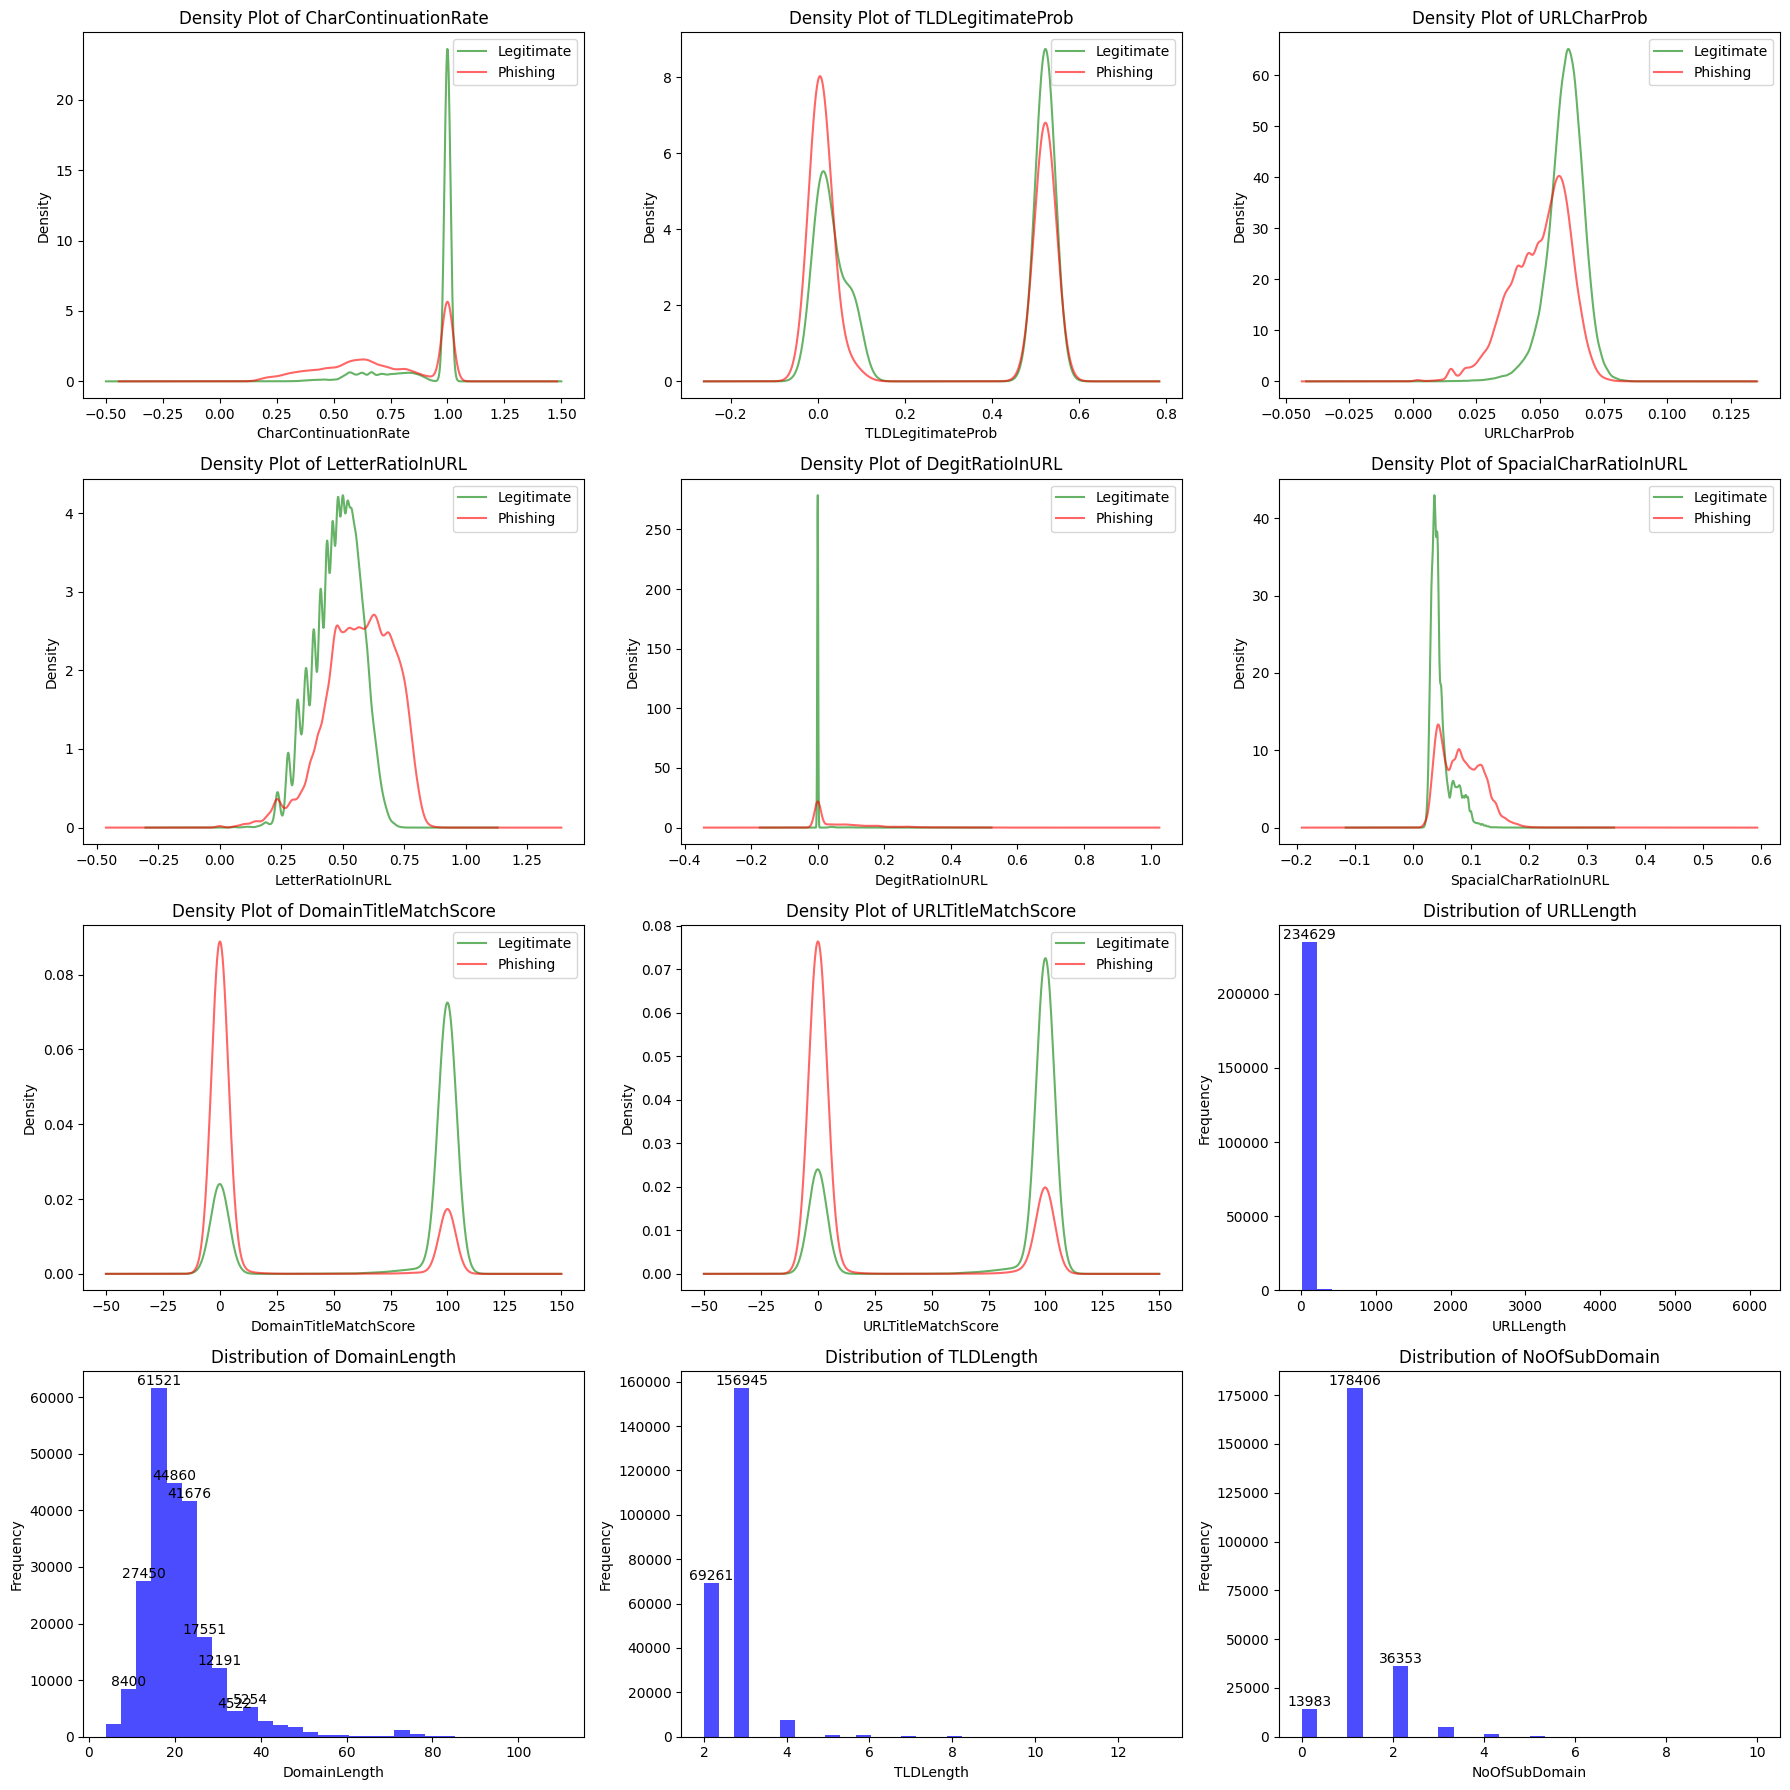

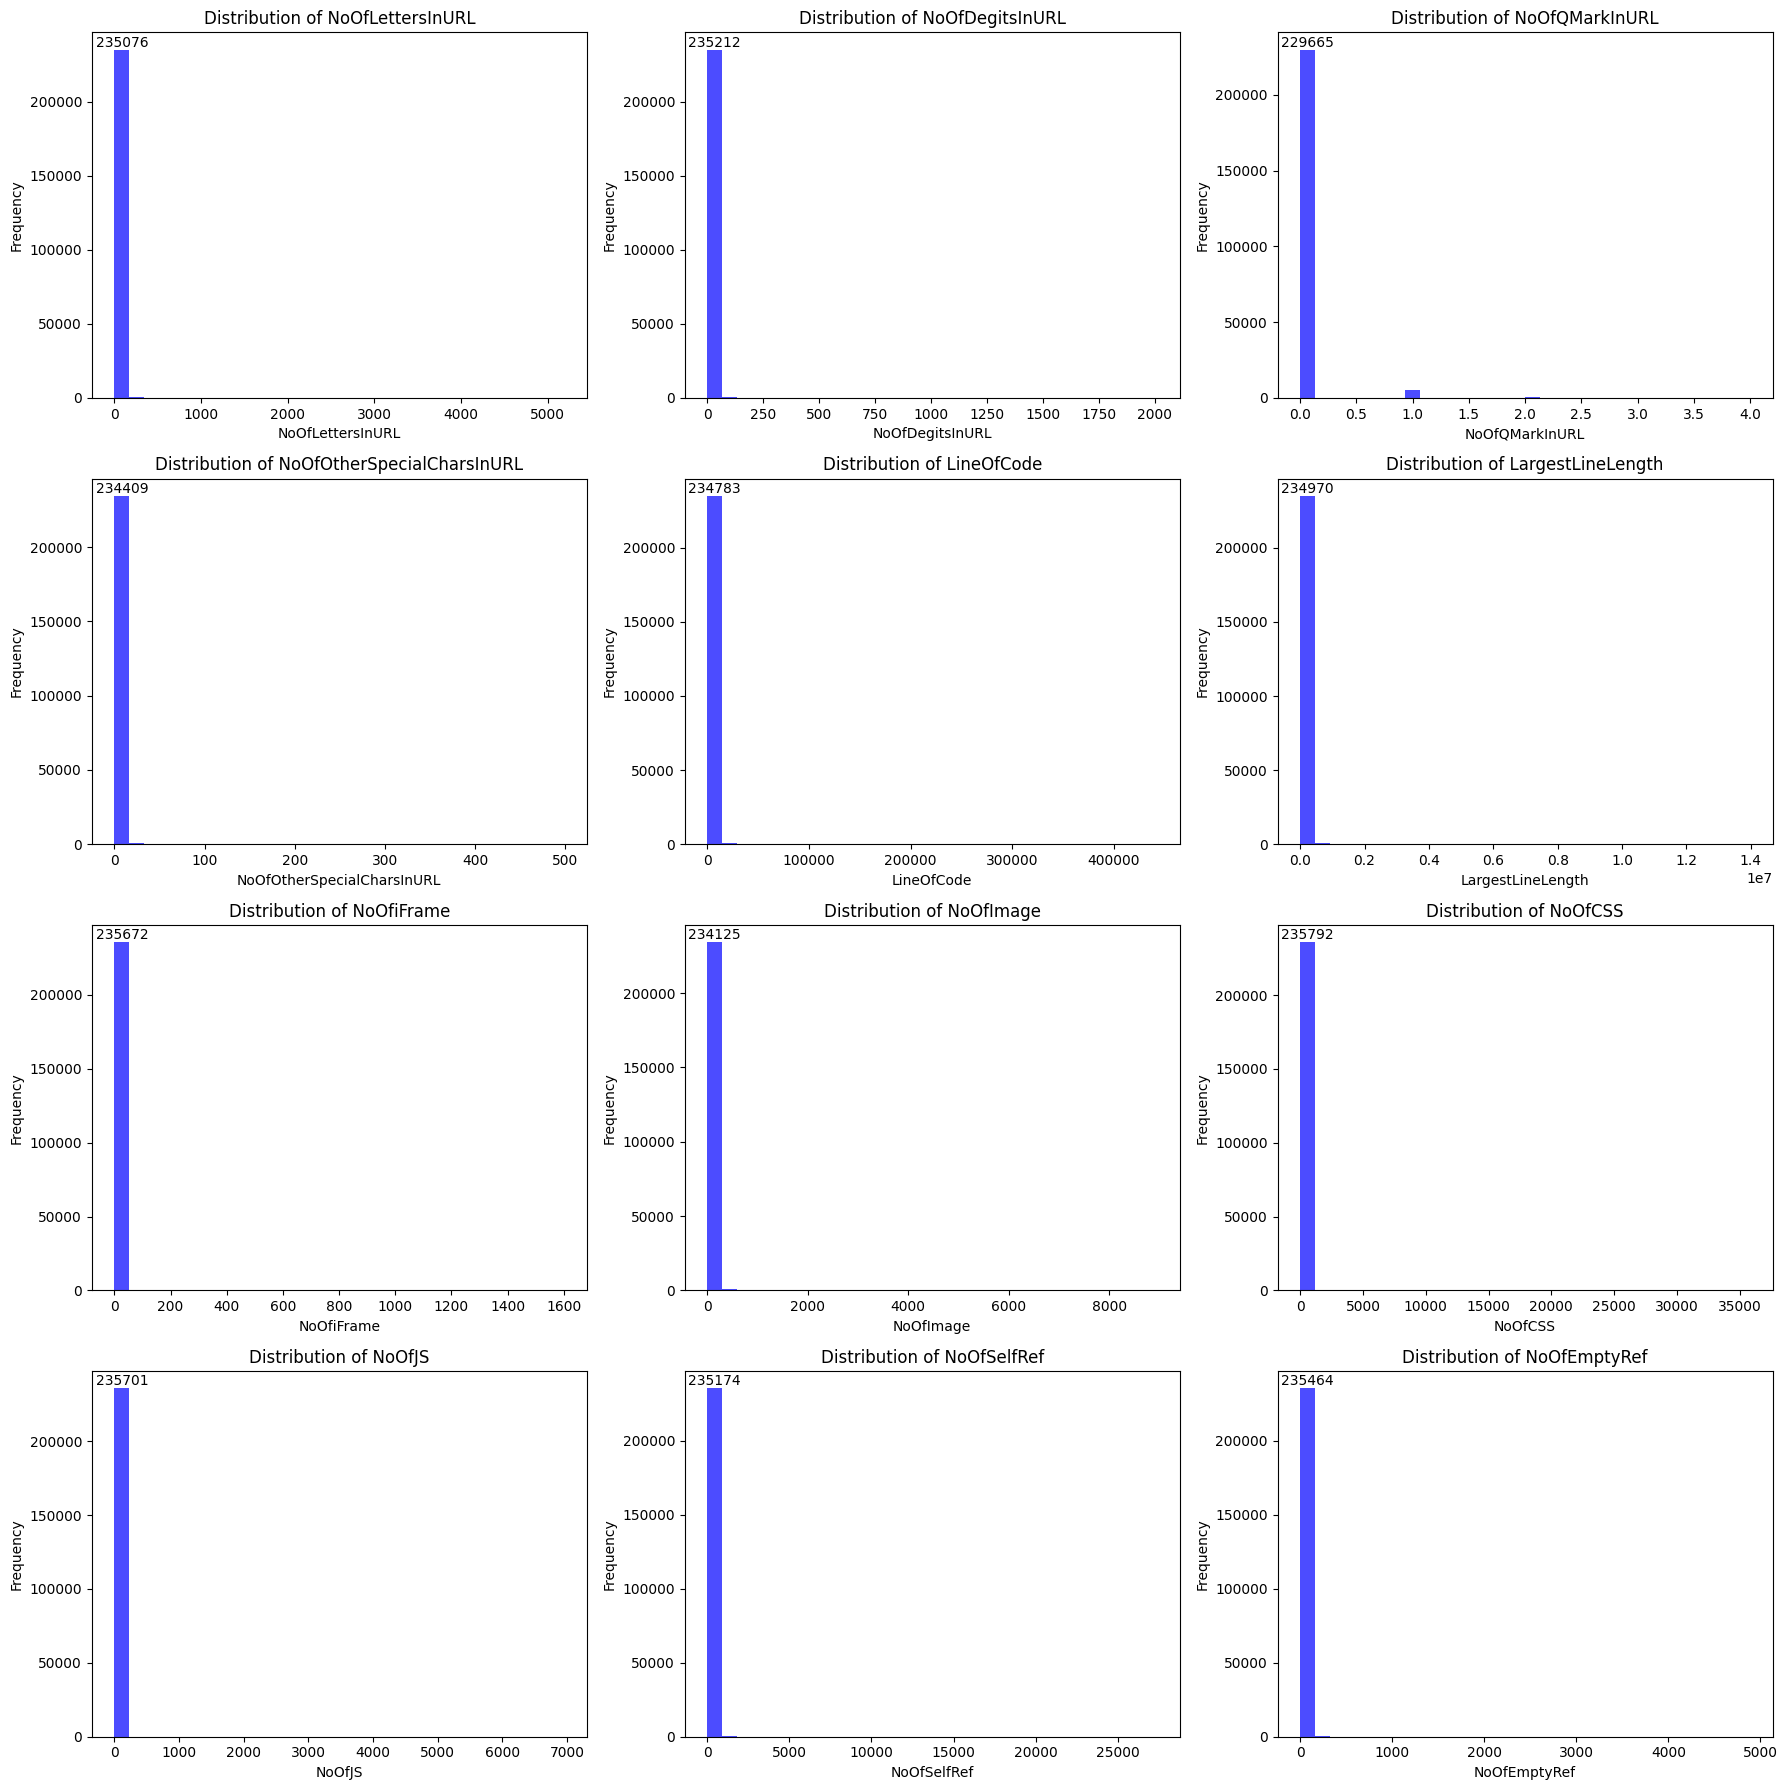

KeyError: 'HasTitle'

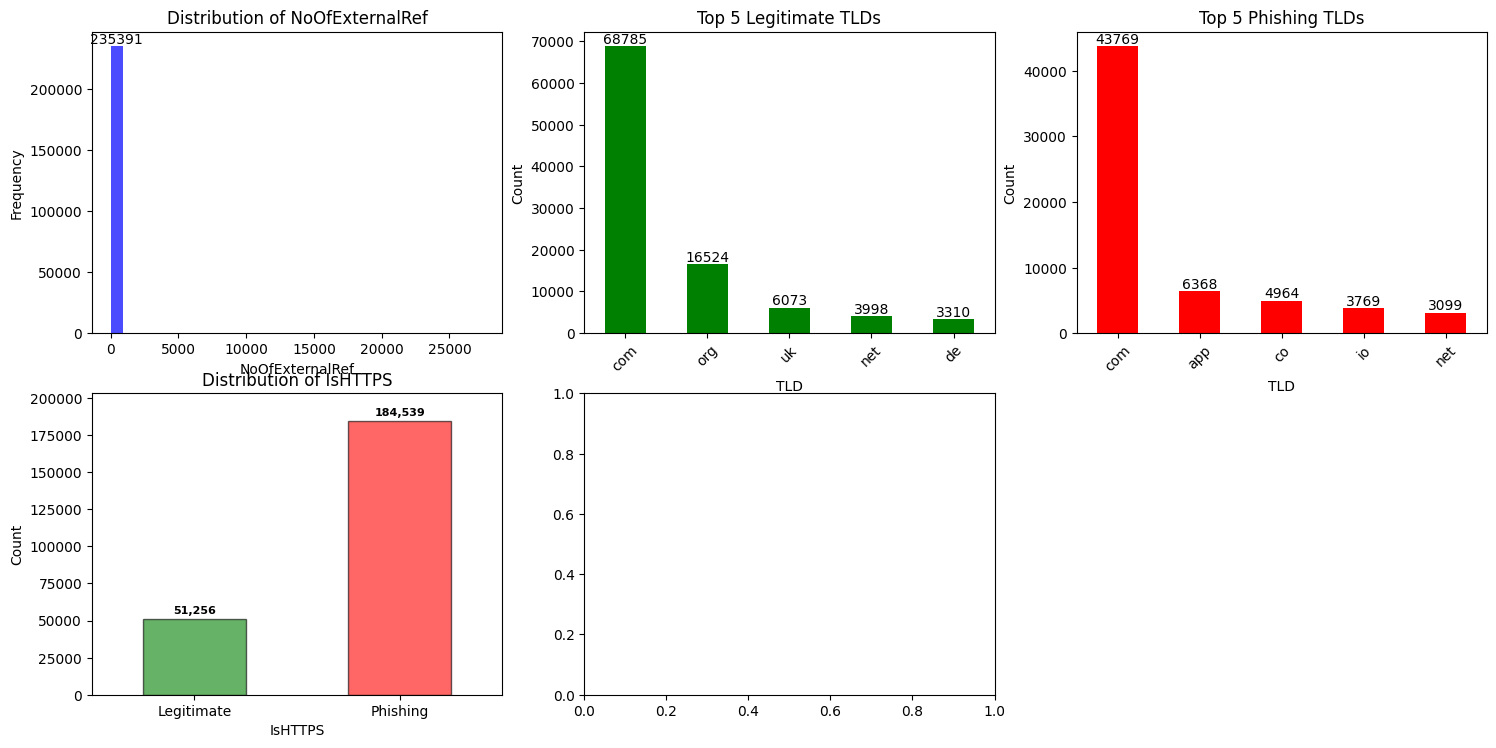

In [14]:
PlotFeatureGraph([
    'URLLength', 'DomainLength', 'TLD', 'CharContinuationRate',
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
    'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
    'DegitRatioInURL', 'NoOfQMarkInURL', 'NoOfOtherSpecialCharsInURL',
    'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
    'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
    'IsResponsive', 'HasDescription', 'NoOfiFrame', 'HasSocialNet',
    'HasSubmitButton', 'HasPasswordField', 'HasCopyrightInfo', 'NoOfImage',
    'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'
]);

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the models
rf = RandomForestClassifier(random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42)  # Neural Network
gbm = GradientBoostingClassifier(random_state=42)

In [16]:
# 1. Random Forest
rf.fit(X_train, y_train)
rf_pred_test = rf.predict(X_test)

print("Random Forest was successfully trained.")

Random Forest was successfully trained.


In [17]:
# 2. Neural Network (MLP)
mlp.fit(X_train, y_train)
mlp_pred_test = mlp.predict(X_test)

print("Multilayer Perceptron was successfully trained.")

Multilayer Perceptron was successfully trained.


In [18]:
# 3. Gradient Boosting
gbm.fit(X_train, y_train)
gbm_pred_test = gbm.predict(X_test)

print("Gradient Boosting Machine was successfully trained.")

Gradient Boosting Machine was successfully trained.


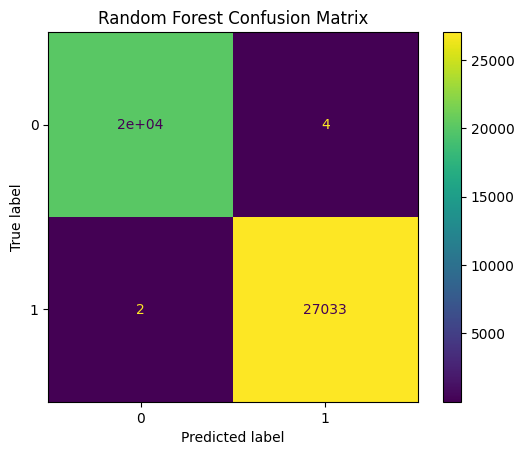

Random Forest Accuracy: 99.99%


In [19]:
# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred_test)
ConfusionMatrixDisplay(rf_cm).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Evaluate the random forest model
accuracy = accuracy_score(y_test, rf_pred_test)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

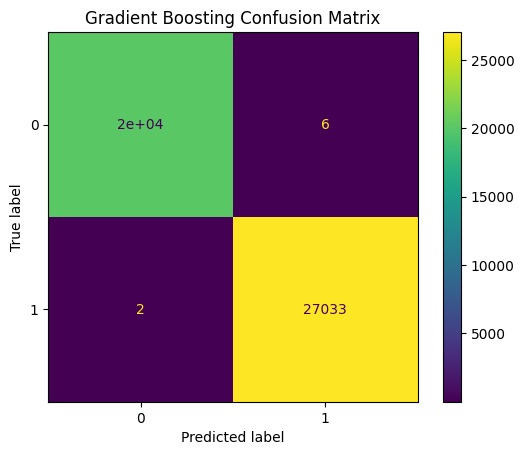

Gradient Boosting Accuracy: 99.98%


In [20]:

# Confusion matrix for Gradient Boosting
gbm_cm = confusion_matrix(y_test, gbm_pred_test)
ConfusionMatrixDisplay(gbm_cm).plot()

plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# Evaluate the gradient boosting model
accuracy = accuracy_score(y_test, gbm_pred_test)
print(f"Gradient Boosting Accuracy: {accuracy * 100:.2f}%")

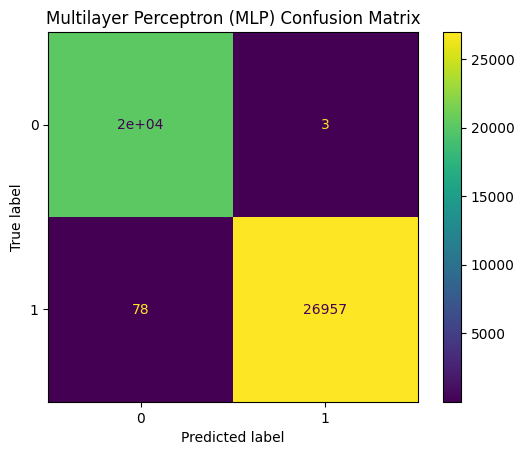

Multilayer Perceptron Accuracy: 99.83%


In [21]:
# Confusion matrix for MLP (Neural Network)
mlp_cm = confusion_matrix(y_test, mlp_pred_test)
ConfusionMatrixDisplay(mlp_cm).plot()

plt.title("Multilayer Perceptron (MLP) Confusion Matrix")
plt.show()

# Evaluate the Multilayer Perceptron model
accuracy = accuracy_score(y_test, mlp_pred_test)
print(f"Multilayer Perceptron Accuracy: {accuracy * 100:.2f}%")

In [22]:
from sklearn.ensemble import VotingClassifier

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('mlp', mlp), ('gbm', gbm)],  # List of (name, model)
    voting='hard'  # Use 'soft' for averaged predicted probabilities, 'hard' for majority vote
)

# Train the voting ensemble
voting_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

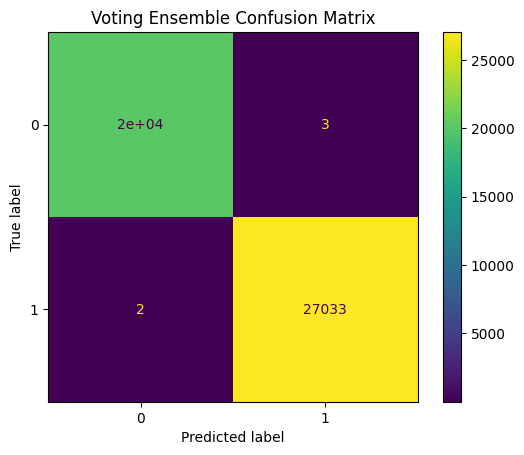

Voting Ensemble Accuracy: 99.99%


In [23]:
voting_cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(voting_cm).plot()

plt.title("Voting Ensemble Confusion Matrix")
plt.show()

print(f"Voting Ensemble Accuracy: {accuracy * 100:.2f}%")

In [24]:
# Import necessary packages
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score for each model

# Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred_test)
rf_precision = precision_score(y_test, rf_pred_test)
rf_recall = recall_score(y_test, rf_pred_test)
rf_f1 = f1_score(y_test, rf_pred_test)

# SVM
svm_accuracy = accuracy_score(y_test, mlp_pred_test)
mlp_precision = precision_score(y_test, mlp_pred_test)
svm_recall = recall_score(y_test, mlp_pred_test)
svm_f1 = f1_score(y_test, mlp_pred_test)

# Gradient Boosting
gbm_accuracy = accuracy_score(y_test, gbm_pred_test)
gbm_precision = precision_score(y_test, gbm_pred_test)
gbm_recall = recall_score(y_test, gbm_pred_test)
gbm_f1 = f1_score(y_test, gbm_pred_test)

# Stacking
stacking_accuracy = accuracy_score(y_test, y_pred)
stacking_precision = precision_score(y_test, y_pred)
stacking_recall = recall_score(y_test, y_pred)
stacking_f1 = f1_score(y_test, y_pred)

# Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Multilayer Perceptron', 'Gradient Boosting', 'Stacking'],
    'Accuracy': [rf_accuracy, svm_accuracy, gbm_accuracy, stacking_accuracy],
    'Precision': [rf_precision, mlp_precision, gbm_precision, stacking_precision],
    'Recall': [rf_recall, svm_recall, gbm_recall, stacking_recall],
    'F1 Score': [rf_f1, svm_f1, gbm_f1, stacking_f1]
})

# Display the results table
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.999873,0.999852,0.999926,0.999889
1,Multilayer Perceptron,0.998282,0.999889,0.997115,0.998500
2,Gradient Boosting,0.999830,0.999778,0.999926,0.999852
3,Stacking,0.999894,0.999889,0.999926,0.999908


In [25]:
import joblib

# Define the file paths for saving the models
rf_model_path = 'models/random_forest_model.pkl'
mlp_model_path = 'models/mlp_model.pkl'
gbm_model_path = 'models/gradient_boosting_model.pkl'
stacking_model_path = 'models/stacking_model.pkl'

# Save the trained models
joblib.dump(rf, rf_model_path)
joblib.dump(mlp, mlp_model_path)
joblib.dump(gbm, gbm_model_path)
joblib.dump(voting_clf, stacking_model_path)

# Return the paths to the saved models
print(f"Your models have been saved to the following paths {rf_model_path, mlp_model_path, gbm_model_path, stacking_model_path}")


Your models have been saved to the following paths ('models/random_forest_model.pkl', 'models/mlp_model.pkl', 'models/gradient_boosting_model.pkl', 'models/stacking_model.pkl')
